<span style="font-size: 24px;">LAB 3</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 3,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1.

In [3]:
import pandas as pd
from sklearn.datasets import make_blobs

n_samples = 100
centers = [(1, 1, 1, 1), (-1, -1, -1, -1), (-1, 1, -1, 1)]

X, y = make_blobs(n_samples=[n_samples, n_samples, n_samples], centers=centers, n_features=4, random_state=66)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Class'] = y

print(df)

     Feature 1  Feature 2  Feature 3  Feature 4  Class
0     1.439847   1.434110  -0.409108   1.416377      0
1    -0.559653   1.372639  -0.059310   0.119933      1
2     0.810036   2.599695   1.642355   0.026950      0
3    -1.972750  -0.460406  -1.807678  -0.908722      1
4    -0.558580  -1.801960  -1.057055  -1.106985      1
..         ...        ...        ...        ...    ...
295   0.498910  -0.991068  -0.537735   0.613477      0
296   0.307127   1.785787   0.936413   2.241595      0
297  -0.520330  -0.348843  -0.468653   1.482624      2
298   1.249772   0.252768  -0.341082   2.669773      0
299  -1.671758   2.431516  -0.416310  -0.670575      2

[300 rows x 5 columns]


2.

        Feature 1   Feature 2   Feature 3   Feature 4       Class
count  300.000000  300.000000  300.000000  300.000000  300.000000
mean    -0.327026    0.375947   -0.302641    0.325063    1.000000
std      1.386090    1.328082    1.437598    1.369234    0.817861
min     -3.523737   -2.838069   -3.721950   -2.672312    0.000000
25%     -1.292189   -0.479047   -1.360147   -0.716740    0.000000
50%     -0.381318    0.420790   -0.393539    0.405168    1.000000
75%      0.686993    1.357082    0.756760    1.251098    2.000000
max      3.139795    4.307417    3.956916    3.768648    2.000000


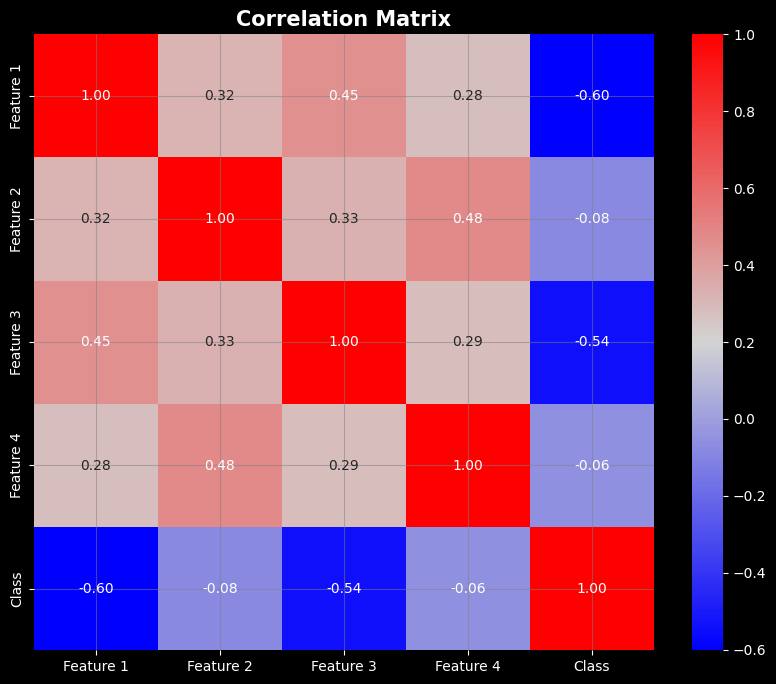

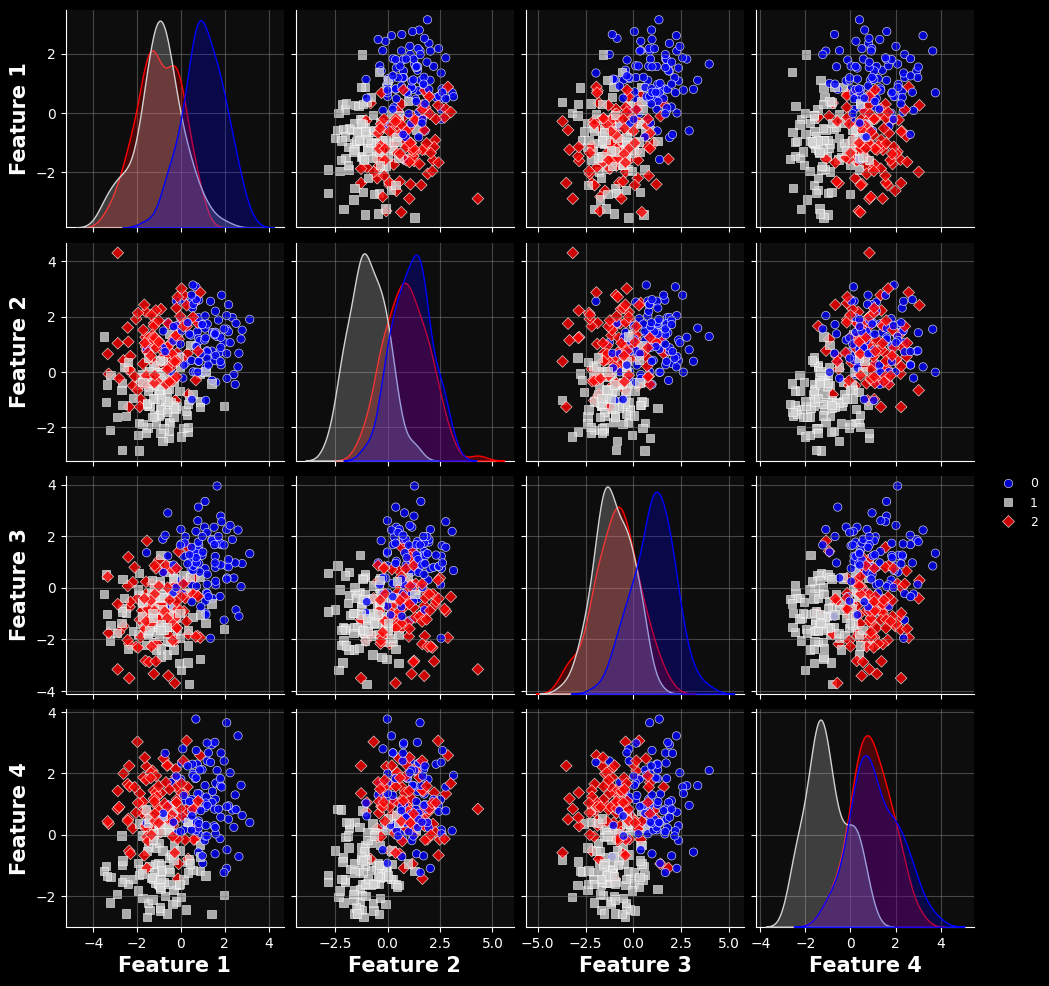

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Создаем пользовательскую палитру
colors = ["blue", "lightgray", "red"]
cmap = LinearSegmentedColormap.from_list("blue_to_purple", colors)
palette = [cmap(i) for i in np.linspace(0, 1, 3)]

# Ключевые характеристики датасета
print(df.describe())

# Корреляции
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)
plt.title('Correlation Matrix')
plt.show()

# Визуализация всех пар переменных
sns.pairplot(df, hue='Class', markers=['o', 's', 'D'], palette=palette, diag_kind='kde', plot_kws={'alpha':0.8})
plt.show()

3.

In [5]:
def create_additional_data(df, A, B):
    new_points = np.array([[B, -B, B, -B]] * A)
    new_class = np.zeros(A)
    new_df = pd.DataFrame(new_points, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
    new_df['Class'] = new_class
    return pd.concat([df, new_df], ignore_index=True)

A_list = [1, 10, 100]
B_list = [5, 10, 20]
dfs = dict()

dfs["default"] = df

for a in A_list:
    for b in B_list:
        dfs[f"df_A{a}_B{b}"] = create_additional_data(df, A=a, B=b)
        
print(dfs)

{'default':      Feature 1  Feature 2  Feature 3  Feature 4  Class
0     1.439847   1.434110  -0.409108   1.416377      0
1    -0.559653   1.372639  -0.059310   0.119933      1
2     0.810036   2.599695   1.642355   0.026950      0
3    -1.972750  -0.460406  -1.807678  -0.908722      1
4    -0.558580  -1.801960  -1.057055  -1.106985      1
..         ...        ...        ...        ...    ...
295   0.498910  -0.991068  -0.537735   0.613477      0
296   0.307127   1.785787   0.936413   2.241595      0
297  -0.520330  -0.348843  -0.468653   1.482624      2
298   1.249772   0.252768  -0.341082   2.669773      0
299  -1.671758   2.431516  -0.416310  -0.670575      2

[300 rows x 5 columns], 'df_A1_B5':      Feature 1  Feature 2  Feature 3  Feature 4  Class
0     1.439847   1.434110  -0.409108   1.416377    0.0
1    -0.559653   1.372639  -0.059310   0.119933    1.0
2     0.810036   2.599695   1.642355   0.026950    0.0
3    -1.972750  -0.460406  -1.807678  -0.908722    1.0
4    -0.558580  

4.

95% CI for AUC: [0.89, 0.96]


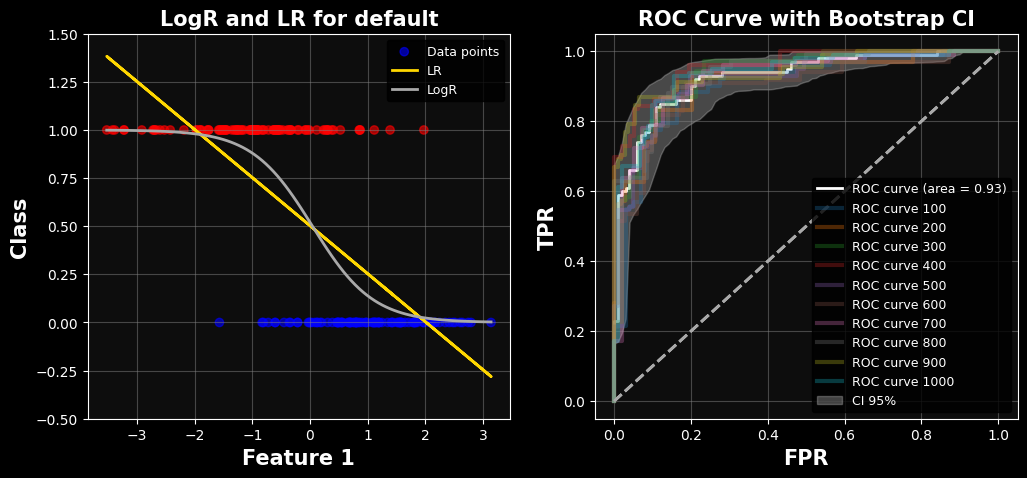

95% CI for AUC: [0.89, 0.96]


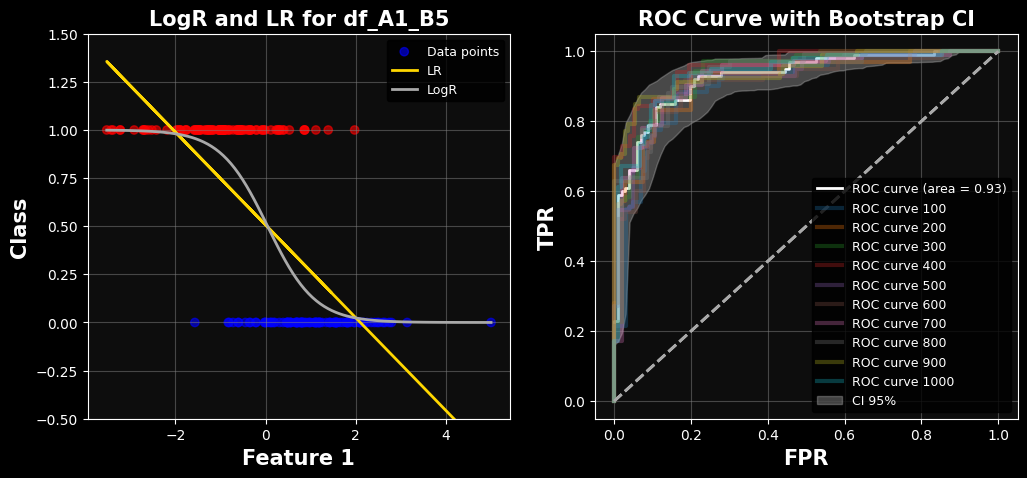

95% CI for AUC: [0.89, 0.96]


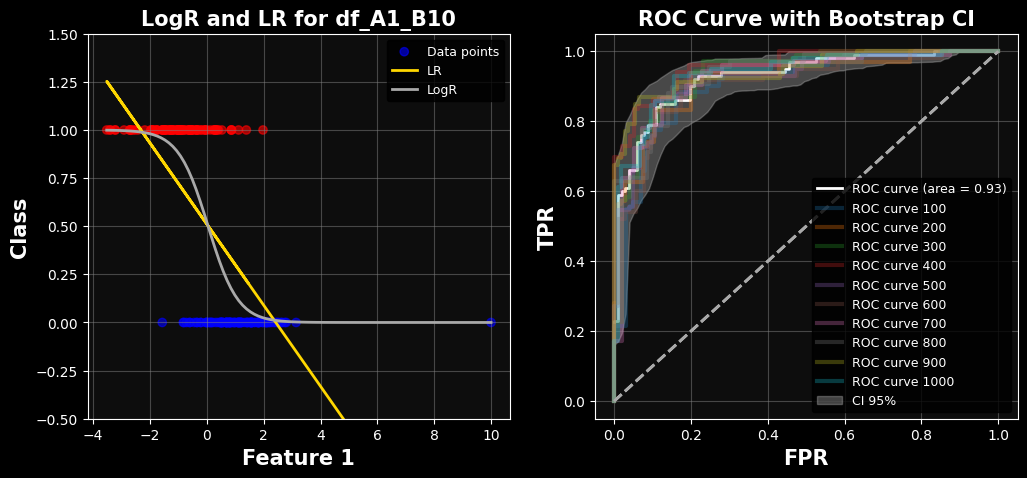

95% CI for AUC: [0.89, 0.96]


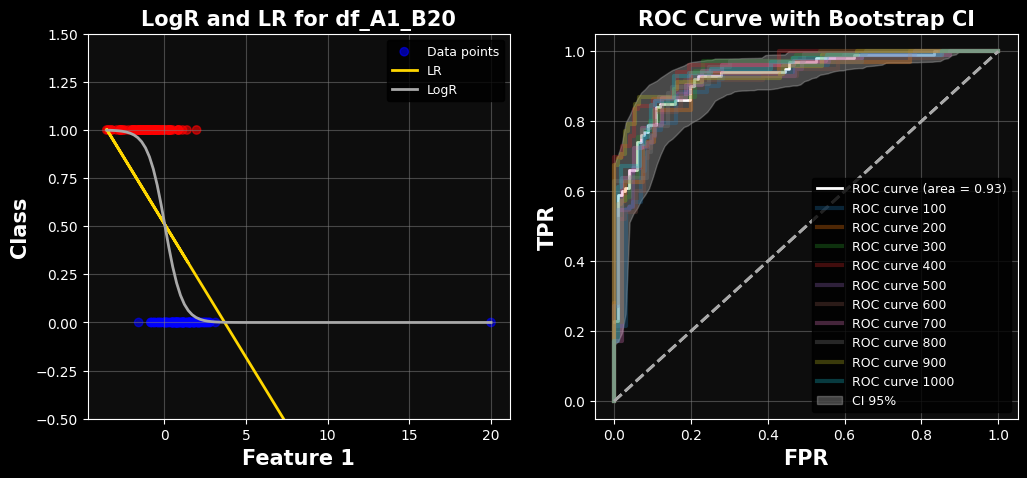

95% CI for AUC: [0.90, 0.96]


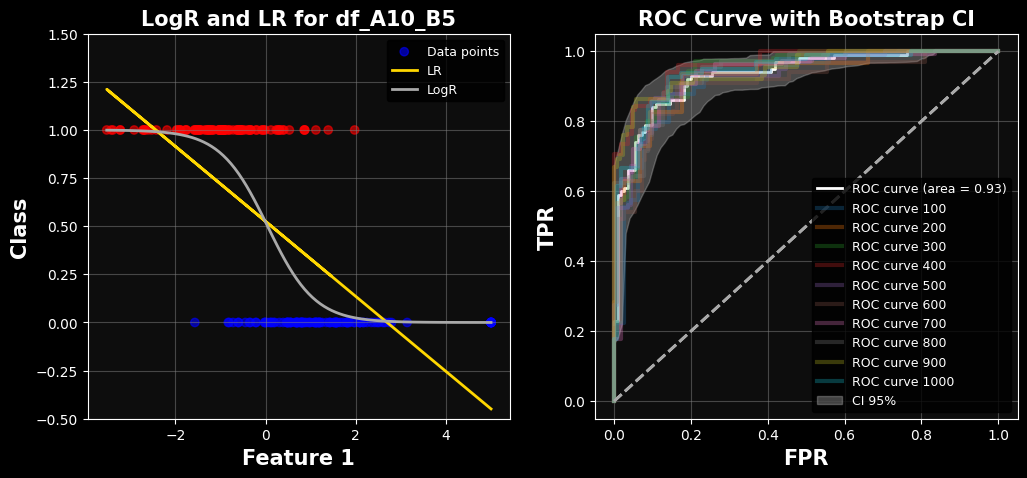

95% CI for AUC: [0.90, 0.96]


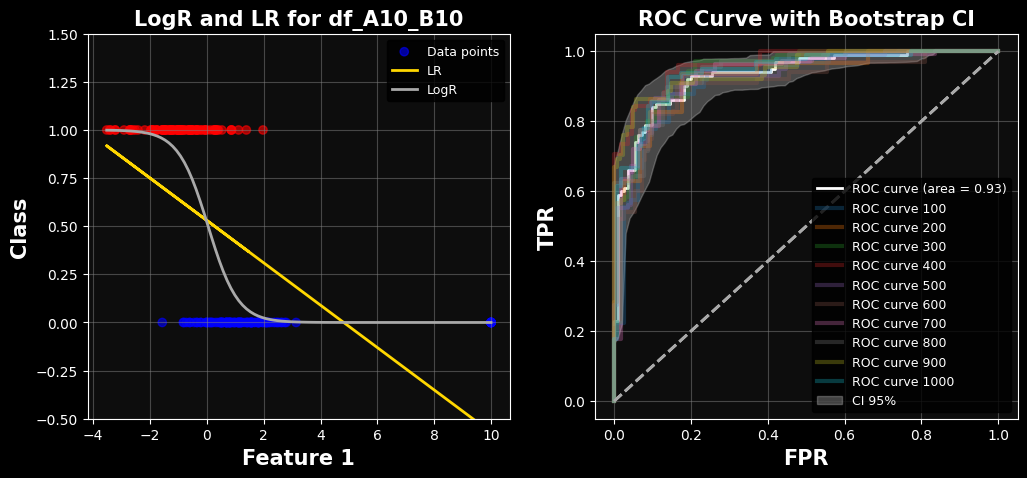

95% CI for AUC: [0.90, 0.96]


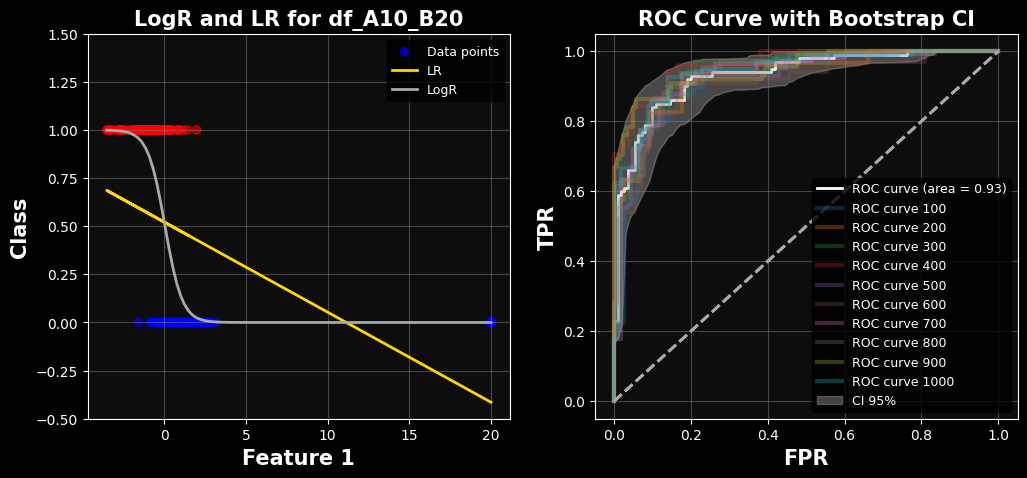

95% CI for AUC: [0.94, 0.98]


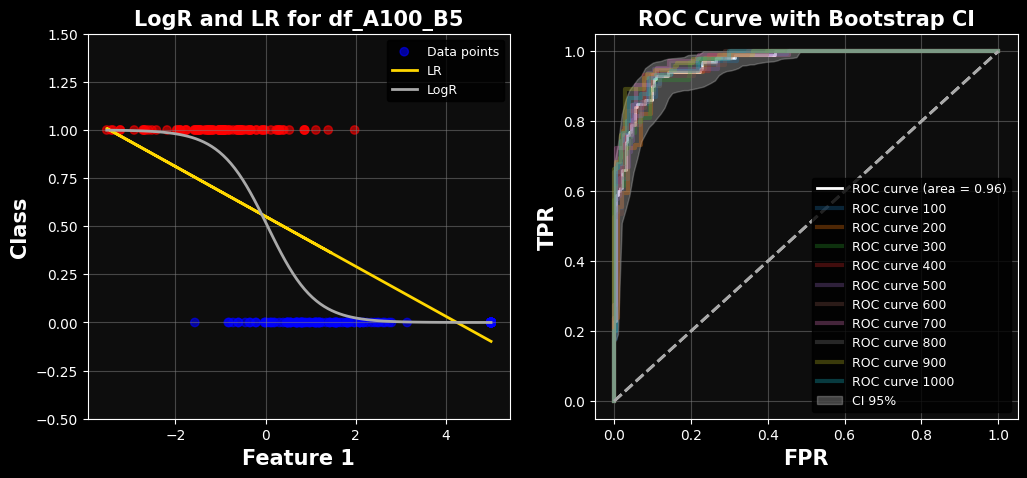

95% CI for AUC: [0.94, 0.98]


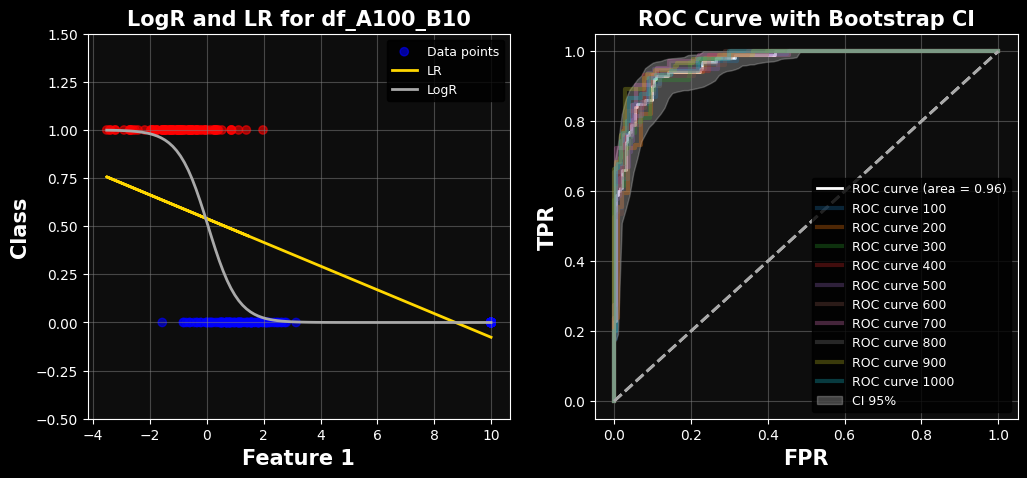

95% CI for AUC: [0.94, 0.98]


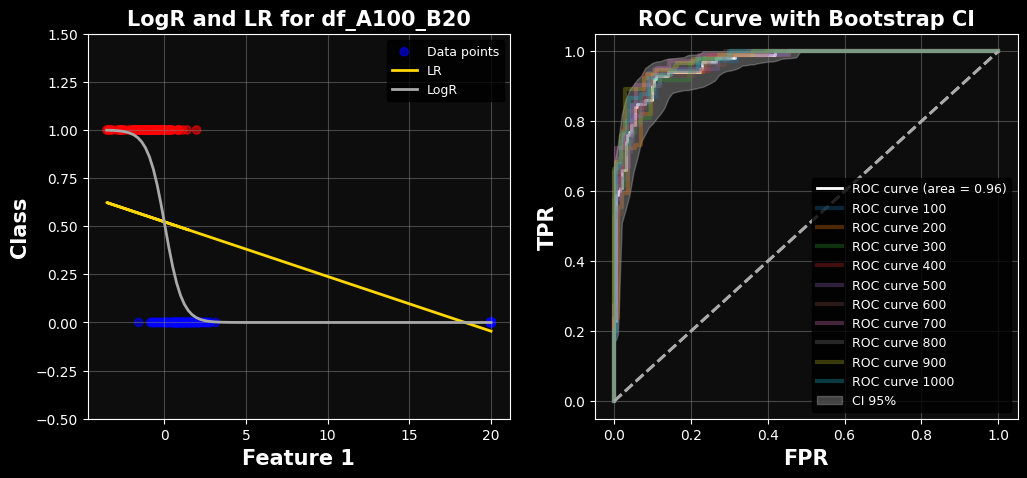

In [6]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc

feature_choose = 'Feature 1'

def draw_dataset(name, df):
    subset = df[df['Class'].isin([0, 1])]
    X = subset[[feature_choose]] 
    y = subset['Class']

    # Построение и визуализация моделей
    lin_reg = LinearRegression().fit(X, y)
    log_reg = LogisticRegression().fit(X, y)

    x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_vals = pd.DataFrame(x_vals, columns=X.columns) 
    y_vals = log_reg.predict_proba(x_vals)[:, 1]

    # Визуализация
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, c=y, label='Data points', cmap=cmap, alpha=0.6)
    plt.plot(X, lin_reg.predict(X), color='gold', label='LR', linewidth=2)
    plt.plot(x_vals, y_vals, color='darkgray', label='LogR', linewidth=2)

    # Настройки графика
    plt.xlabel(feature_choose)
    plt.ylabel('Class')
    plt.title(f'LogR and LR for {name}')
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid(True)


    y_prob = log_reg.predict_proba(X)[:, 1]    # Предсказание вероятностей для логистической регрессии
    fpr, tpr, _ = roc_curve(y, y_prob)    # Расчет ROC-кривой
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='white', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
    plt.legend(loc='lower right')

    n_bootstraps = 1000
    bootstrapped_scores = []
    all_tpr = []
    np.random.seed(42) 

    for i in range(n_bootstraps):
        # Бутстреп
        X_resampled, y_resampled = resample(X, y, random_state=i)
        log_reg.fit(X_resampled, y_resampled)
        y_prob_resampled = log_reg.predict_proba(X_resampled)[:, 1]
        if (i + 1) % 100 == 0:
            plt.plot(fpr_resampled, tpr_resampled, alpha=0.3, label=f'ROC curve {i+1}')
        
        # AUC
        fpr_resampled, tpr_resampled, _ = roc_curve(y_resampled, y_prob_resampled)
        roc_auc_resampled = auc(fpr_resampled, tpr_resampled)
        bootstrapped_scores.append(roc_auc_resampled)
        
        # Доверительные интервалы
        all_tpr.append(np.interp(np.linspace(0, 1, 100), fpr_resampled, tpr_resampled))


    # ROC-кривая
    mean_tpr = np.mean(all_tpr, axis=0)
    mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

    # Доверительные интервалы
    ci_lower = np.percentile(bootstrapped_scores, 2.5)
    ci_upper = np.percentile(bootstrapped_scores, 97.5)
    print(f'95% CI for AUC: [{ci_lower:.2f}, {ci_upper:.2f}]')

    # Отображение границ доверительного интервала
    plt.fill_between(np.linspace(0, 1, 100), np.percentile(all_tpr, 2.5, axis=0), np.percentile(all_tpr, 97.5, axis=0), 
                    color='lightgrey', alpha=0.3, label='CI 95%')

    # Графики
    plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve with Bootstrap CI')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


for key, log_df in dfs.items():
    draw_dataset(key, log_df)

5.

In [7]:
# Функция для создания нового признака X' на основе уравнения регрессии
def create_logdf(X, lin_reg):
    subset = df[df['Class'].isin([0, 1])]
    X = subset[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']] 
    y = subset['Class']
    
    lin_reg.fit(X, y)  # X - матрица признаков, y - классы
    
    # Вычисление X'
    X_new = lin_reg.intercept_ + np.dot(X, lin_reg.coef_)
    return pd.DataFrame({'X_prime': X_new, 'Class': y})
  
  
subset = df[df['Class'].isin([0, 1])]
X = subset[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']] 
y = subset['Class']

# Обучение модели на исходных данных df
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # X - матрица признаков, y - классы

log_dfs = dict()
# Создание новых датасетов для df и df_A_B
for key, df in dfs.items():
    log_dfs[f'log_{key}'] = create_logdf(df, lin_reg)
    
print(log_dfs)

{'log_default':       X_prime  Class
0    0.106948      0
1    0.410150      1
2   -0.000667      0
3    1.006758      1
4    0.972312      1
..        ...    ...
293  1.121759      1
294  0.121906      0
295  0.563651      0
296 -0.014061      0
298  0.131524      0

[200 rows x 2 columns], 'log_df_A1_B5':       X_prime  Class
0    0.124502    0.0
1    0.432495    1.0
2    0.001313    0.0
3    1.031405    1.0
4    0.952616    1.0
..        ...    ...
294  0.099274    0.0
295  0.553639    0.0
296  0.013324    0.0
298  0.147465    0.0
300  0.407487    0.0

[201 rows x 2 columns], 'log_df_A1_B10':       X_prime  Class
0    0.128222    0.0
1    0.436928    1.0
2    0.002607    0.0
3    1.036272    1.0
4    0.950922    1.0
..        ...    ...
294  0.096924    0.0
295  0.553394    0.0
296  0.018567    0.0
298  0.151086    0.0
300  0.235001    0.0

[201 rows x 2 columns], 'log_df_A1_B20':       X_prime  Class
0    0.125824    0.0
1    0.433786    1.0
2    0.002599    0.0
3    1.032799    1.

6.

95% CI for AUC: [1.00, 1.00]


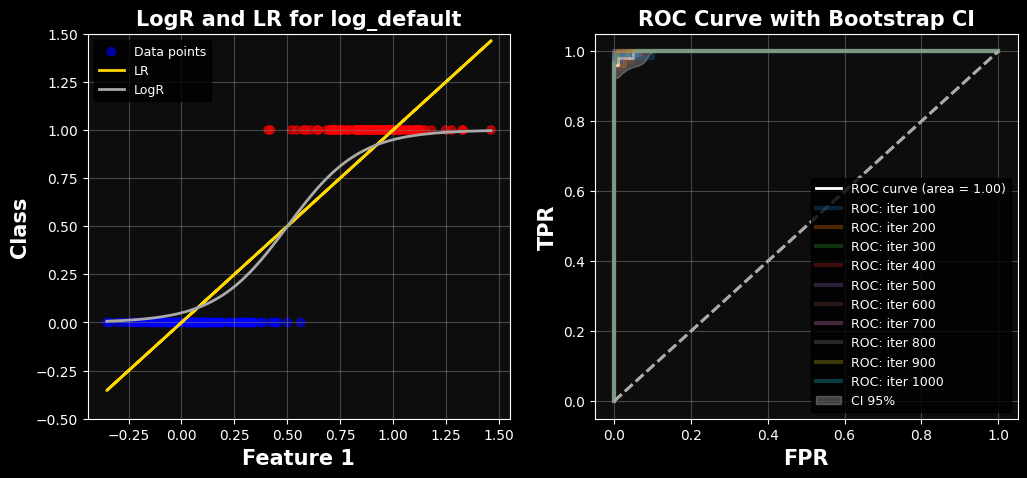

95% CI for AUC: [1.00, 1.00]


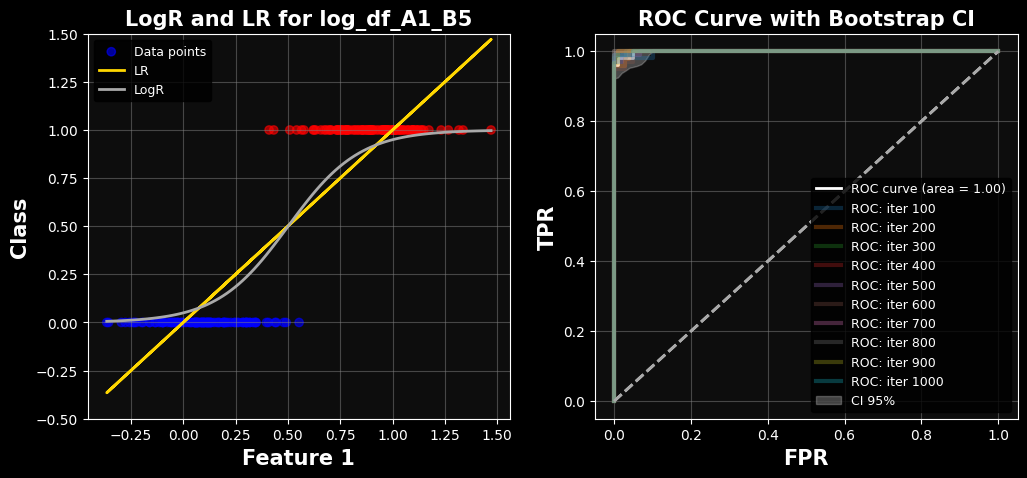

95% CI for AUC: [1.00, 1.00]


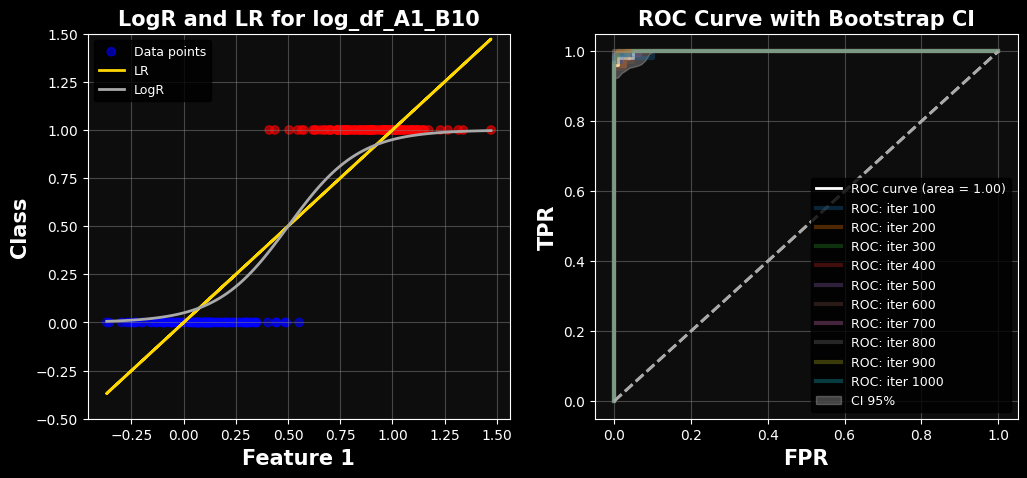

95% CI for AUC: [1.00, 1.00]


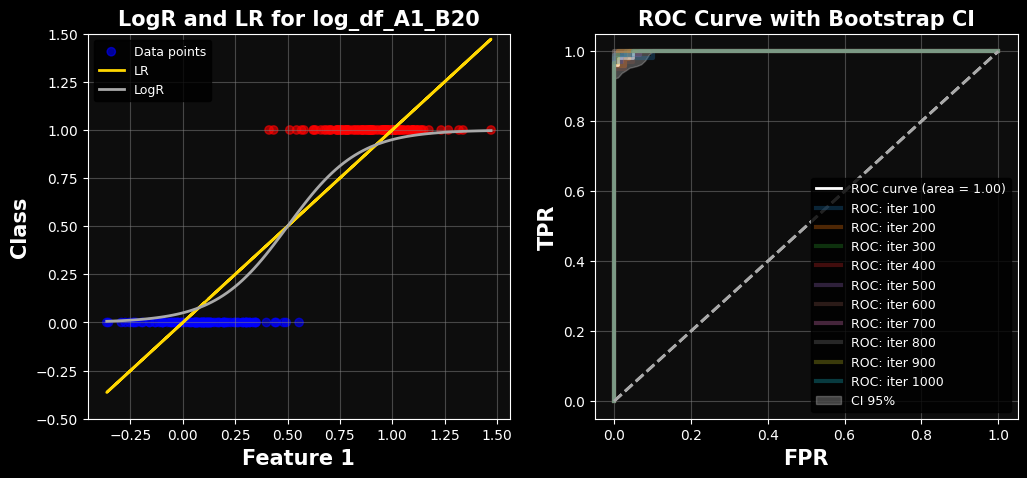

95% CI for AUC: [1.00, 1.00]


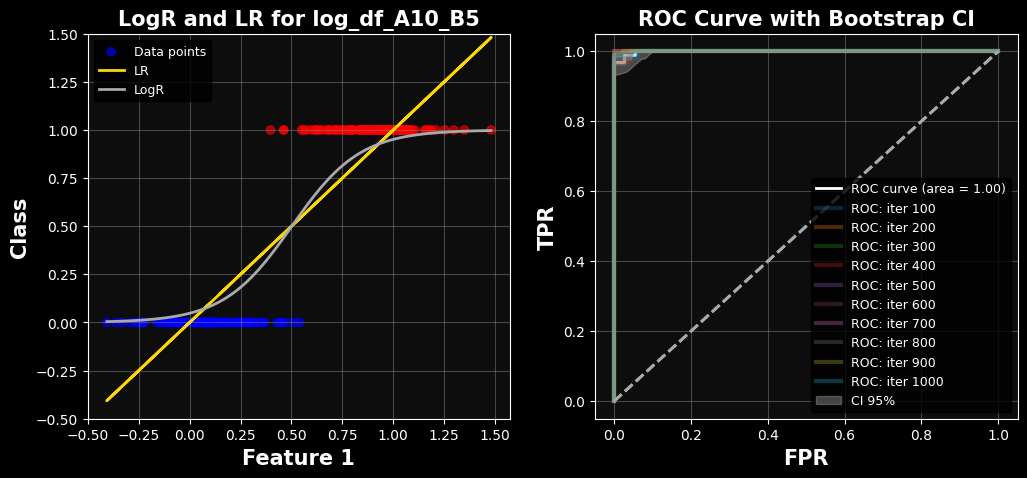

95% CI for AUC: [1.00, 1.00]


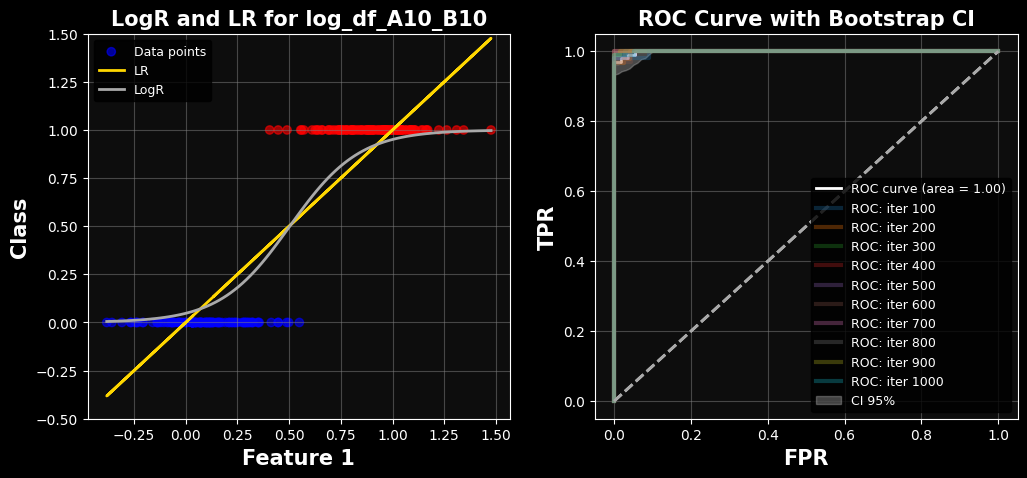

95% CI for AUC: [1.00, 1.00]


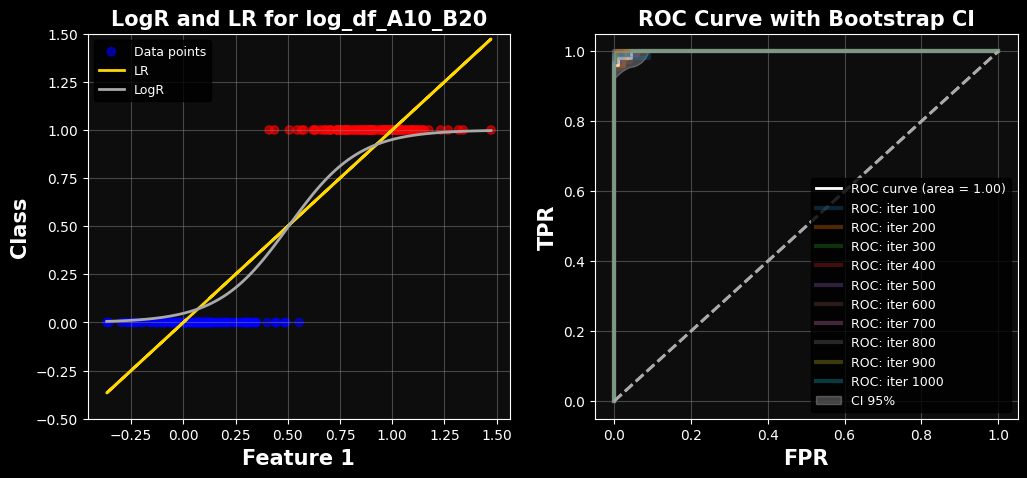

95% CI for AUC: [1.00, 1.00]


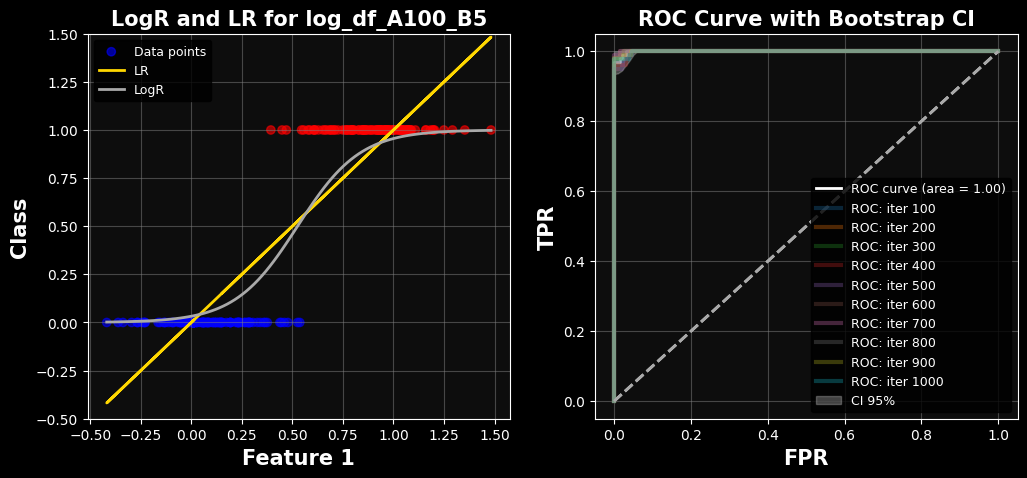

95% CI for AUC: [1.00, 1.00]


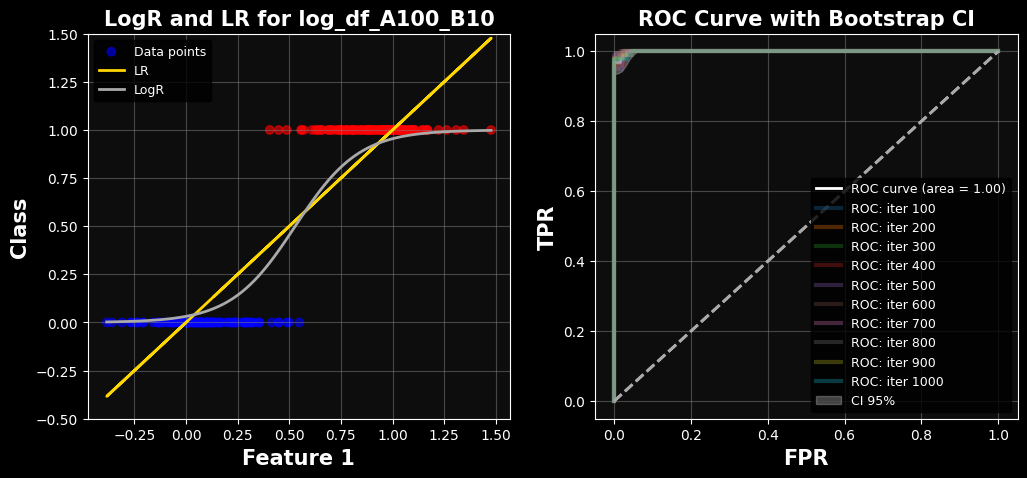

95% CI for AUC: [1.00, 1.00]


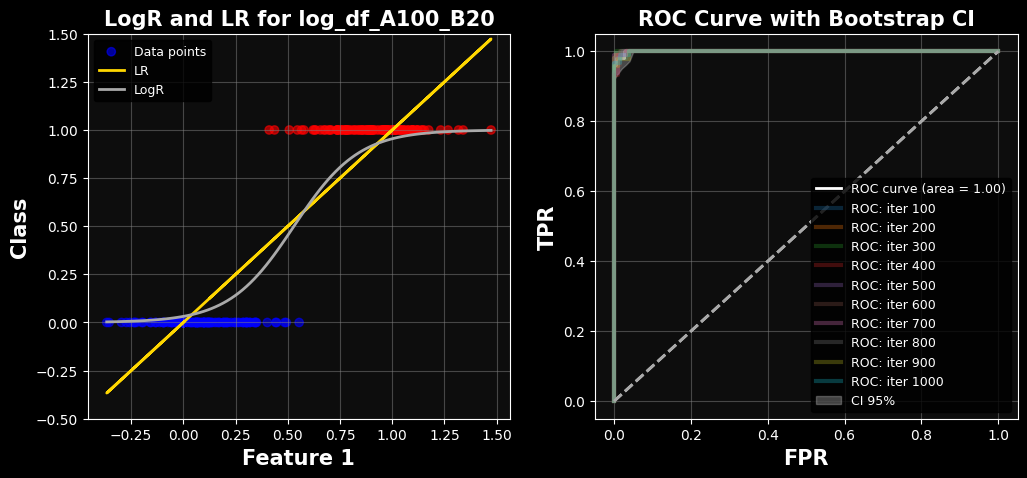

In [8]:
def draw_dataset(name, df):
    subset = df[df['Class'].isin([0, 1])]
    X = subset[['X_prime']] 
    y = subset['Class']

    # Построение и визуализация моделей
    lin_reg = LinearRegression().fit(X, y)
    log_reg = LogisticRegression().fit(X, y)

    x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_vals = pd.DataFrame(x_vals, columns=X.columns) 
    y_vals = log_reg.predict_proba(x_vals)[:, 1]

    # Визуализация
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, c=y, label='Data points', cmap=cmap, alpha=0.6)
    plt.plot(X, lin_reg.predict(X), color='gold', label='LR', linewidth=2)
    plt.plot(x_vals, y_vals, color='darkgray', label='LogR', linewidth=2)

    # Настройки графика
    plt.xlabel(feature_choose)
    plt.ylabel('Class')
    plt.title(f'LogR and LR for {name}')
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid(True)


    y_prob = log_reg.predict_proba(X)[:, 1]    # Предсказание вероятностей для логистической регрессии
    fpr, tpr, _ = roc_curve(y, y_prob)    # Расчет ROC-кривой
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='white', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
    plt.legend(loc='lower right')

    n_bootstraps = 1000
    bootstrapped_scores = []
    all_tpr = []
    np.random.seed(42) 

    for i in range(n_bootstraps):
        # Бутстреп
        X_resampled, y_resampled = resample(X, y, random_state=i)
        log_reg.fit(X_resampled, y_resampled)
        y_prob_resampled = log_reg.predict_proba(X_resampled)[:, 1]
        if (i + 1) % 100 == 0:
            plt.plot(fpr_resampled, tpr_resampled, alpha=0.3, label=f'ROC: iter {i+1}')
        
        # AUC
        fpr_resampled, tpr_resampled, _ = roc_curve(y_resampled, y_prob_resampled)
        roc_auc_resampled = auc(fpr_resampled, tpr_resampled)
        bootstrapped_scores.append(roc_auc_resampled)
        
        # Доверительные интервалы
        all_tpr.append(np.interp(np.linspace(0, 1, 100), fpr_resampled, tpr_resampled))


    # ROC-кривая
    mean_tpr = np.mean(all_tpr, axis=0)
    mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

    # Доверительные интервалы
    ci_lower = np.percentile(bootstrapped_scores, 2.5)
    ci_upper = np.percentile(bootstrapped_scores, 97.5)
    print(f'95% CI for AUC: [{ci_lower:.2f}, {ci_upper:.2f}]')

    # Отображение границ доверительного интервала
    plt.fill_between(np.linspace(0, 1, 100), np.percentile(all_tpr, 2.5, axis=0), np.percentile(all_tpr, 97.5, axis=0), 
                    color='lightgrey', alpha=0.3, label='CI 95%')

    # Графики
    plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve with Bootstrap CI')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

for key, log_df in log_dfs.items():
    draw_dataset(key, log_df)

7.

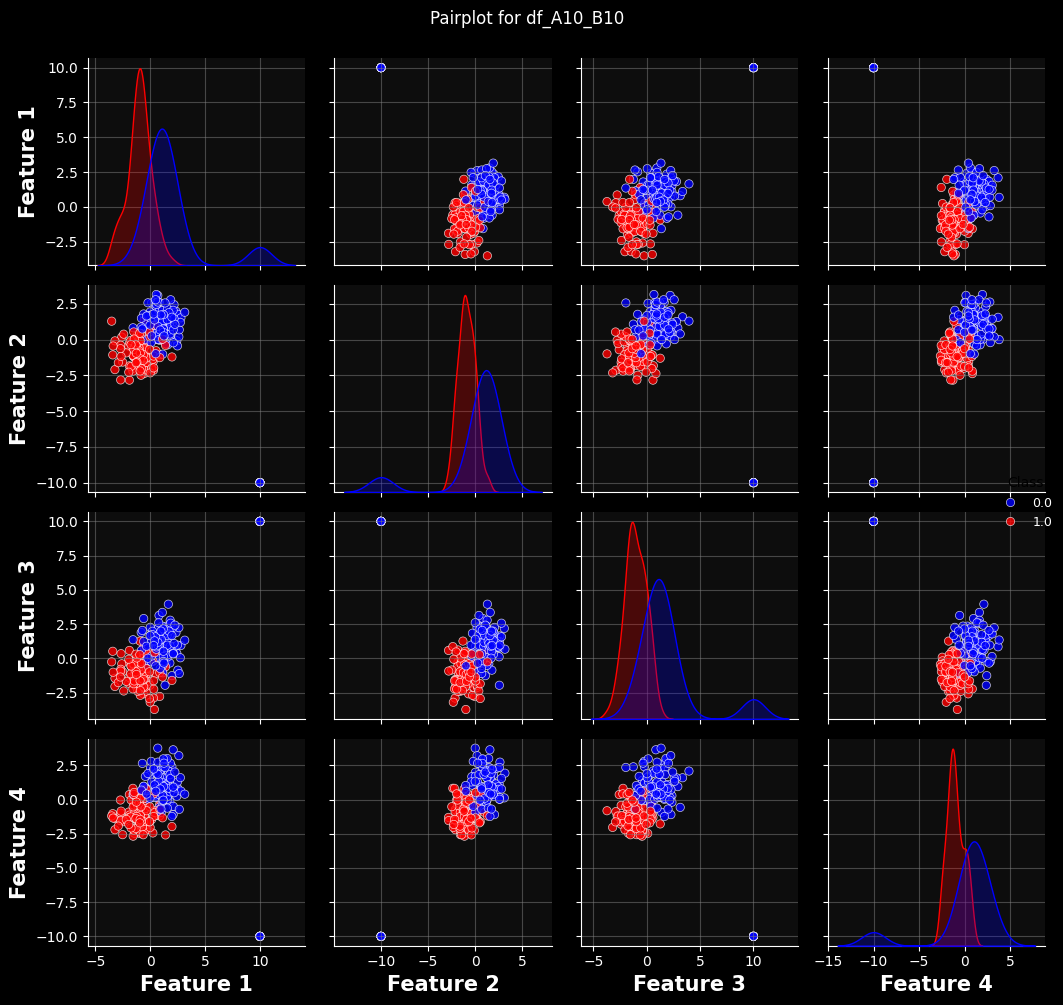

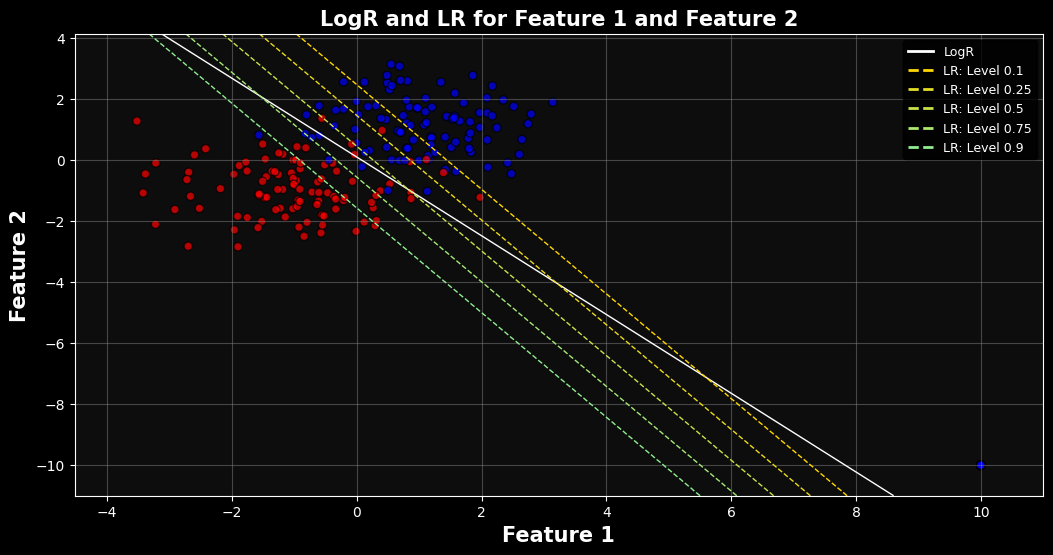

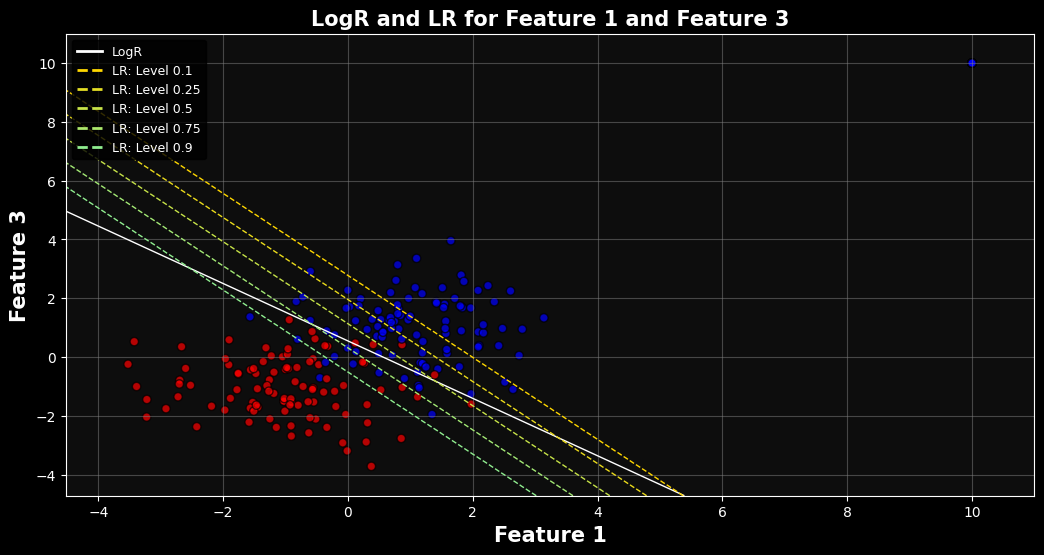

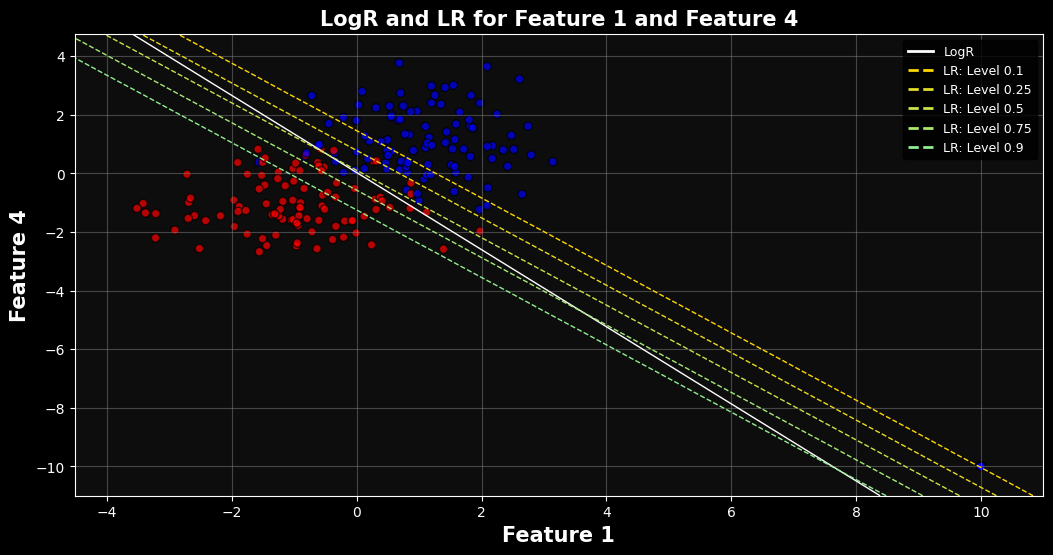

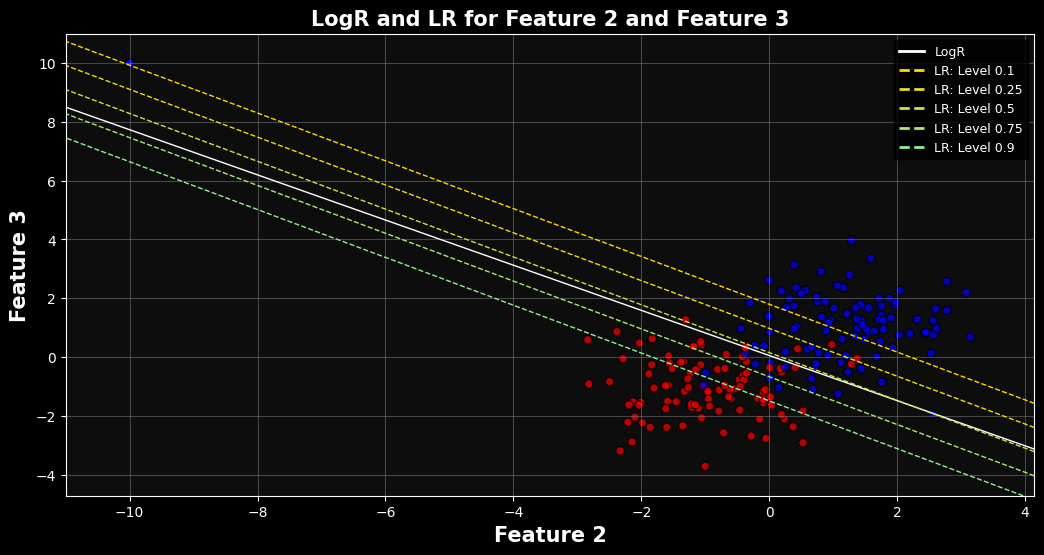

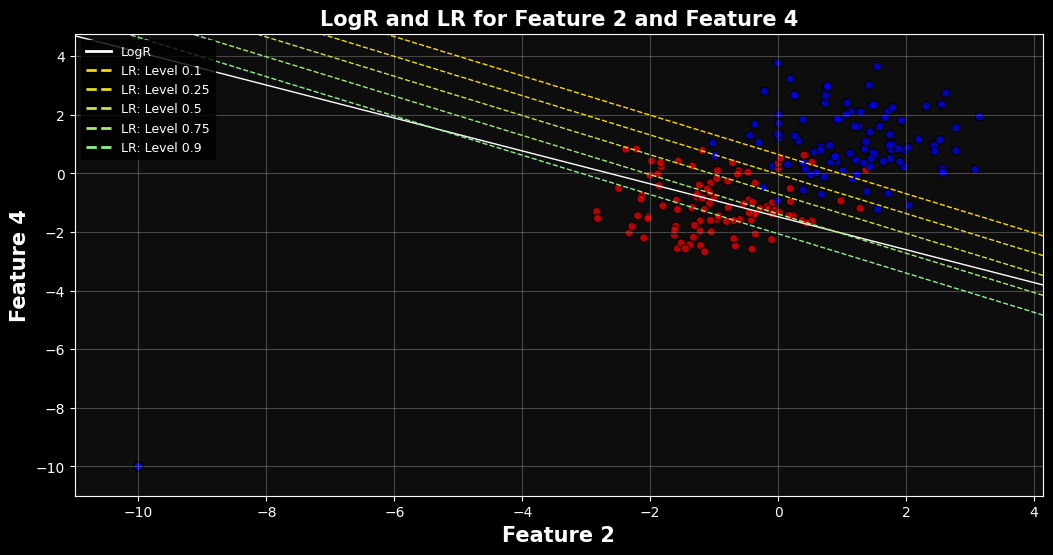

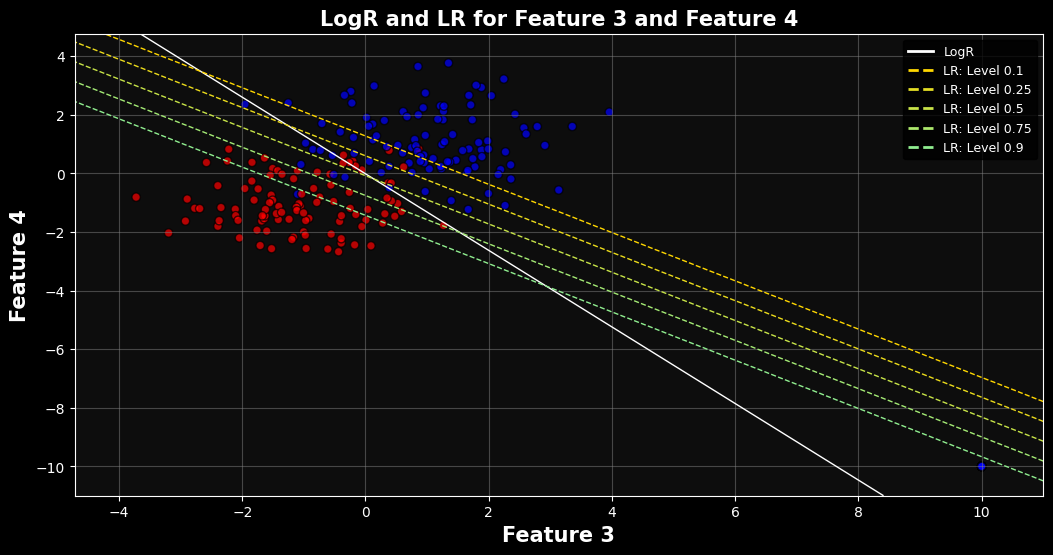

In [13]:
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgb

df_choose = 'df_A10_B10'
df_A_B = dfs[df_choose][dfs[df_choose]['Class'].isin([0,1])]

features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
X_subset = df_A_B[features]
y_subset = df_A_B['Class']

log_reg = LogisticRegression()
log_reg.fit(X_subset, y_subset)


# Визуализация всех пар признаков с использованием pairplot
font_dict = {
    'fontsize': title_fontsize,          
    'fontweight': 'bold',  
    'color': line_color
}
g = sns.pairplot(df_A_B, hue='Class', palette=[palette[0]] + [palette[-1]], plot_kws={'alpha': 0.8})
g.figure.suptitle(f'Pairplot for {df_choose}', y=1, fontdict=font_dict)
plt.tight_layout()
plt.show()

# Визуализация линий множественной линейной регрессии и решающих границ логистической регрессии
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        feature1 = features[i]
        feature2 = features[j]
        
        # Сетка для отображения контуров
        x_min, x_max = X_subset[feature1].min() - 1, X_subset[feature1].max() + 1
        y_min, y_max = X_subset[feature2].min() - 1, X_subset[feature2].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        
        # Линия множественной линейной регрессии
        X_reg = X_subset[[feature1, feature2]]
        reg = LinearRegression()
        reg.fit(X_reg, y_subset)
        Z_reg = reg.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2]))
        Z_reg = Z_reg.reshape(xx.shape)

        # Предсказание вероятности для логистической регрессии
        mean_values = np.mean(X_subset.drop([feature1, feature2], axis=1), axis=0)
        grid_input = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2])
        
        # Добавляем средние значения для оставшихся признаков
        for col, val in zip(X_subset.drop([feature1, feature2], axis=1).columns, mean_values):
            grid_input[col] = val

        # Приводим порядок столбцов grid_input в соответствие с X_subset
        grid_input = grid_input[X_subset.columns]
        
        # Предсказание вероятности для логистической регрессии
        Z_log = log_reg.predict_proba(grid_input)[:, 1]
        Z_log = Z_log.reshape(xx.shape)
        
        # Визуализация
        plt.figure(figsize=(12.5, 6))
        plt.scatter(X_subset[feature1], X_subset[feature2], c=y_subset, cmap=cmap, edgecolor='k', alpha=0.7)
        
        # Контуры логистической регрессии
        levels = [0.5]
        white_color = to_rgb("white")
        white_color = np.array(list(white_color))
        white_grad = grad_colors(2, white_color, white_color)
        white_cmap = LinearSegmentedColormap.from_list("white_grad", white_grad)
        plt.contour(xx, yy, Z_reg, levels=levels, cmap=white_cmap, linestyles="solid", linewidths=1)
        legend_elements_1 = [Line2D([0], [0], color=white_grad[i], lw=2, linestyle="solid", label=f"LogR")
            for i, level in enumerate(levels)]
        
        # Линия множественной линейной регрессии        
        gold_color = to_rgb("gold")
        green_color = to_rgb("lightgreen")

        # Преобразуем кортежи в списки
        levels = [0.1, 0.25, 0.5, 0.75, 0.9]
        gold_color = np.array(list(gold_color))
        green_color = np.array(list(green_color))
        gold_green_grad = grad_colors(len(levels), gold_color, green_color)
        gold_green_cmap = LinearSegmentedColormap.from_list("gold_green_grad", gold_green_grad)
        plt.contour(xx, yy, Z_log, levels=levels, cmap=gold_green_cmap, linestyles="dashed", linewidths=1)
        legend_elements_2 = [Line2D([0], [0], color=gold_green_grad[i], lw=2, linestyle="dashed", label=f"LR: Level {level}")
            for i, level in enumerate(levels)]
        
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'LogR and LR for {feature1} and {feature2}')
        plt.legend(handles=legend_elements_1 + legend_elements_2, loc="best")
        plt.show()
